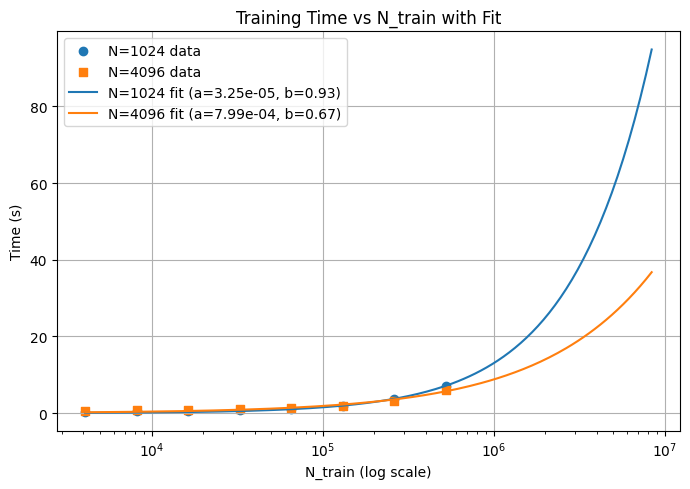

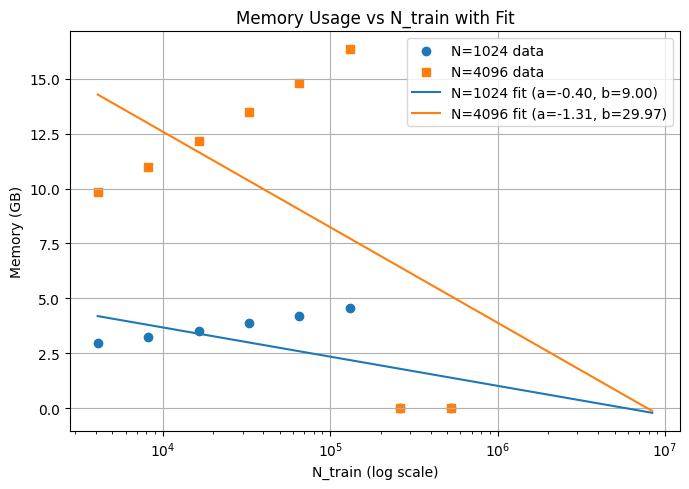

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 数据
N_train = np.array([4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288])

time_1024 = np.array([10.76, 12.66, 15.79, 20.78, 29.53, 52.97, 109.99, 215.44]) / 30
mem_1024  = np.array([2.96, 3.26, 3.53, 3.88, 4.20, 4.57, 0, 0])

time_4096 = np.array([18.48, 21.19, 24.84, 30.55, 40.60, 58.81, 96.78, 177.70]) / 30
mem_4096  = np.array([9.84, 10.97, 12.15, 13.47, 14.80, 16.320, 0, 0])

# 定义拟合函数（幂律）
def power_law(x, a, b):
    return a * np.power(x, b)

# 拟合时间
popt_t1024, _ = curve_fit(power_law, N_train, time_1024, maxfev=10000)
popt_t4096, _ = curve_fit(power_law, N_train, time_4096, maxfev=10000)

# 拟合内存（假设近似线性随 log(N_train)）
def log_linear(x, a, b):
    return a * np.log2(x) + b

popt_m1024, _ = curve_fit(log_linear, N_train, mem_1024, maxfev=10000)
popt_m4096, _ = curve_fit(log_linear, N_train, mem_4096, maxfev=10000)

# 拓展范围到 1e7
x_ext = np.logspace(12, 23, 200, base=2)  # 4096=2^12 到 1e7 ~ 2^23

# 绘图：时间
plt.figure(figsize=(7,5))
plt.scatter(N_train, time_1024, marker="o", label="N=1024 data")
plt.scatter(N_train, time_4096, marker="s", label="N=4096 data")
plt.plot(x_ext, power_law(x_ext, *popt_t1024), label=f"N=1024 fit (a={popt_t1024[0]:.2e}, b={popt_t1024[1]:.2f})")
plt.plot(x_ext, power_law(x_ext, *popt_t4096), label=f"N=4096 fit (a={popt_t4096[0]:.2e}, b={popt_t4096[1]:.2f})")
plt.xscale("log")
plt.xlabel("N_train (log scale)")
plt.ylabel("Time (s)")
plt.title("Training Time vs N_train with Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 绘图：内存
plt.figure(figsize=(7,5))
plt.scatter(N_train, mem_1024, marker="o", label="N=1024 data")
plt.scatter(N_train, mem_4096, marker="s", label="N=4096 data")
plt.plot(x_ext, log_linear(x_ext, *popt_m1024), label=f"N=1024 fit (a={popt_m1024[0]:.2f}, b={popt_m1024[1]:.2f})")
plt.plot(x_ext, log_linear(x_ext, *popt_m4096), label=f"N=4096 fit (a={popt_m4096[0]:.2f}, b={popt_m4096[1]:.2f})")
plt.xscale("log")
plt.xlabel("N_train (log scale)")
plt.ylabel("Memory (GB)")
plt.title("Memory Usage vs N_train with Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

